<a href="https://colab.research.google.com/github/DressPD/electric_motion_forecast/blob/main/Schneider_Electric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import copy
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_hor_disc = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/DiscreteMotion_Data_Horizontalsetup.xlsx", sheet_name = "Sheet1")
data_hor_cont = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/ContinuousMotion_Data_Horizontalsetup.xlsx", sheet_name = "Sheet1")
data_ver_disc = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/DiscreteMotion_Data_Verticalsetup.xlsx", sheet_name = "Tabelle1")
data_ver_cont = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/ContinuousMotion_Data_Verticalsetup.xlsx", sheet_name = "Tabelle1")

In [ ]:
data_hor_disc.head(10)

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
0,0.846,0.044,0.014,0.255,4.009,0.516,5.616,7.860,9.240,9.974999,10.981999,6.578000,12.059999,7.950,12.599,9.990001,9.555000,19.096001,13.938000,0.202
1,0.846,0.044,0.167,0.255,4.009,0.516,5.616,7.860,9.240,9.974999,10.981999,6.578000,12.059999,7.950,12.599,9.990001,9.555000,19.096001,13.938000,0.202
2,0.846,0.044,0.167,0.255,4.009,5.676,5.400,6.930,9.240,9.974999,9.728000,6.578000,11.834999,7.830,12.599,9.990001,10.465000,13.454000,11.039999,0.564
3,0.774,0.147,0.167,4.080,4.199,5.676,5.400,6.930,7.854,8.014999,9.728000,6.578000,11.834999,7.830,7.267,9.287000,10.465000,13.454000,11.039999,0.564
4,0.774,0.147,2.171,4.080,4.199,5.676,5.400,6.468,7.854,8.014999,9.472000,10.372999,11.834999,12.267,7.267,9.287000,15.548001,13.454000,11.280000,10.434
5,0.774,0.147,2.171,4.080,4.199,5.676,5.400,6.468,7.854,8.014999,9.472000,10.372999,11.834999,12.267,7.267,9.287000,15.548001,13.454000,11.280000,10.434
6,0.774,1.470,2.171,4.080,4.199,5.676,5.400,6.468,7.378,7.786000,9.472000,10.372999,11.834999,12.267,4.732,9.036000,15.548001,13.454000,11.280000,10.434
7,0.774,1.470,2.171,4.080,4.199,5.676,5.400,6.468,7.378,7.786000,9.472000,10.372999,11.834999,12.267,4.732,9.036000,15.548001,13.454000,11.280000,10.434
8,0.774,1.470,2.171,4.080,4.199,5.676,5.100,6.468,7.378,7.786000,9.472000,10.372999,11.309000,12.267,4.732,9.036000,15.548001,5.208000,11.280000,10.434
9,0.774,1.470,2.171,4.080,4.199,4.774,5.100,6.468,7.378,7.786000,9.472000,10.372999,11.309000,12.267,4.732,9.036000,15.548001,5.208000,11.280000,10.434


In [ ]:
data_hor_disc.describe()

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,0.843142,1.249023,1.604354,1.951205,2.206332,2.493221,2.730921,2.848026,3.118614,3.295054,3.453644,3.577217,3.732571,3.902852,3.908951,4.052579,4.156900,4.182729,4.218840,4.217175
std,0.253721,0.579047,0.920542,1.298846,1.663406,2.058099,2.446147,2.785256,3.201309,3.574365,3.955490,4.300227,4.628946,5.014324,5.244952,5.600147,5.836061,5.949107,6.142617,6.150047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.834000,1.332000,0.531000,0.294000,0.264000,0.265500,0.264000,0.244000,0.258000,0.264000,0.264000,0.238000,0.234000,0.256000,0.243000,0.255000,0.273000,0.256000,0.255000,0.270000
50%,0.900000,1.458000,2.040000,2.625000,3.204000,3.738000,2.873000,1.220000,0.828000,0.735000,0.606000,0.516000,0.458000,0.417000,0.486000,0.434500,0.426000,0.405000,0.417000,0.447000
75%,0.960000,1.575000,2.210000,2.896000,3.553000,4.242000,4.950000,5.655000,6.498750,7.310000,8.103001,8.639999,8.649000,8.613000,7.670001,7.525000,7.524000,7.560000,7.232000,7.175000
max,1.316000,2.360000,3.528000,5.100000,6.380000,7.608000,9.099999,9.641000,10.642000,11.375999,12.558001,13.631000,14.899000,16.224001,17.237999,19.139999,20.235001,22.019999,23.808001,23.487999


[Text(0.5, 1.0, 'Power Consumption Horizontal Discrete')]

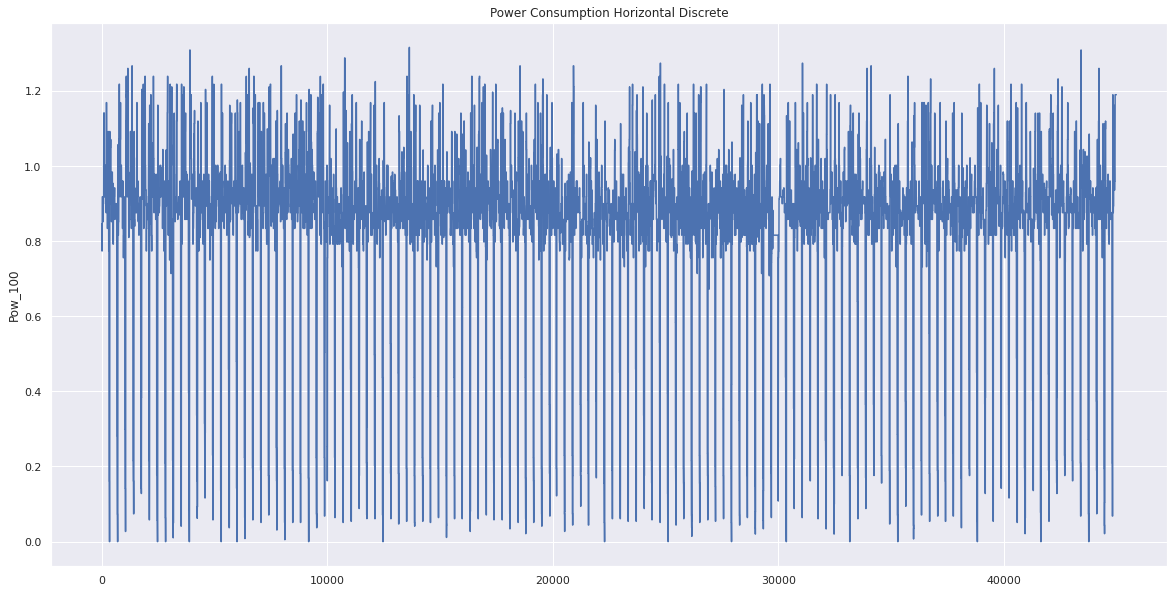

In [ ]:
sns.lineplot(data = data_hor_disc, x = data_hor_disc.index, y = "Pow_100").set(title = "Power Consumption Horizontal Discrete")

[Text(0.5, 1.0, 'Power Consumption Horizontal Continuous')]

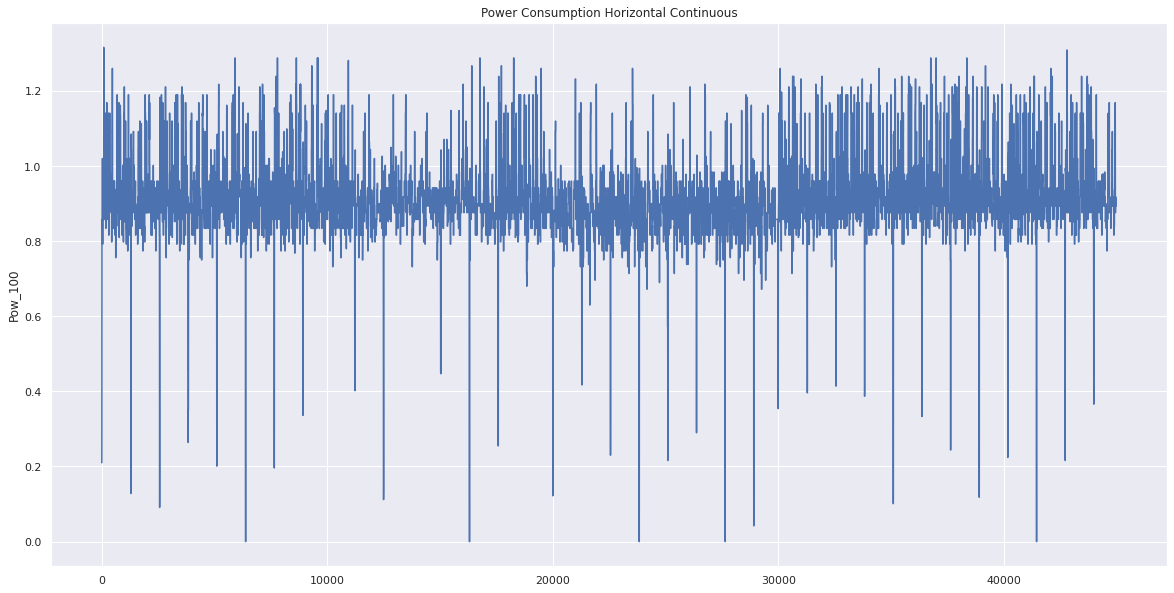

In [ ]:
sns.lineplot(data = data_hor_cont, x = data_hor_cont.index, y = "Pow_100").set(title = "Power Consumption Horizontal Continuous")

[Text(0, 0.5, 'Range of Power Consumption'),
 Text(0.5, 0, 'Speed'),
 Text(0.5, 1.0, 'Statistical Range of Power Consumption over Speed')]

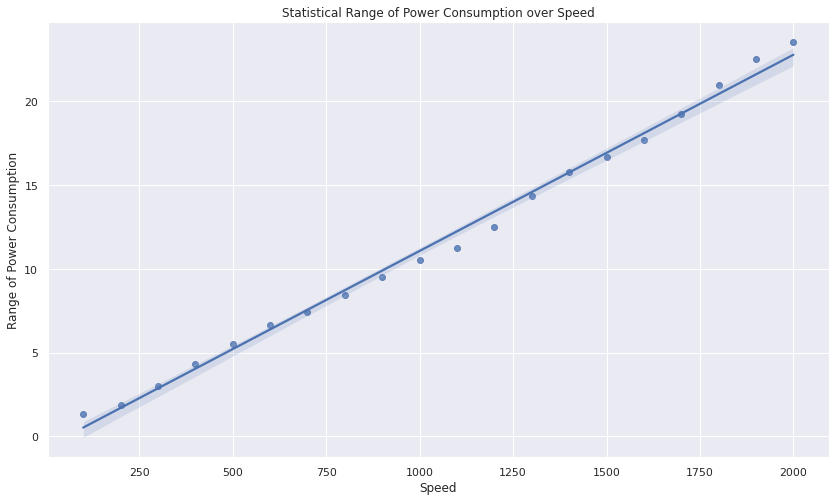

In [ ]:
columns_hor_cont = list(data_hor_cont.columns)
speeds_hor_cont = []
for speed in columns_hor_cont:
  speed = int(speed[4:])
  speeds_hor_cont.append(speed)
# print(speeds_hor_cont)

range_hor_cont = []
for label, content in data_hor_cont.items():
  range_hor_cont.append(abs(content.max() - content.min()))
# print(range_hor_cont)

sns.set(rc={'figure.figsize':(14,8)})
sns.regplot(x=speeds_hor_cont, y=range_hor_cont).set(xlabel="Speed", ylabel="Range of Power Consumption", title="Statistical Range of Power Consumption over Speed")